In [3]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
out_dir=["./result/NoteBook_preprocessWithinClass/","./result/NaiveBayesian/","./result/SVM/","./result/MLP/","./result/Super/"]
subtitle=["BaseCase","GaussianNB(AutoML)","SVM(AutoML)","MLP(AutoMLP)","AutoML(DT,NB,SVM,MLP)"]
filename_out = "synthetic_observational_cate" 
metrics = ["norm_erupt", "qini","energy_distance"]
#metrics = ["energy_distance","x"]

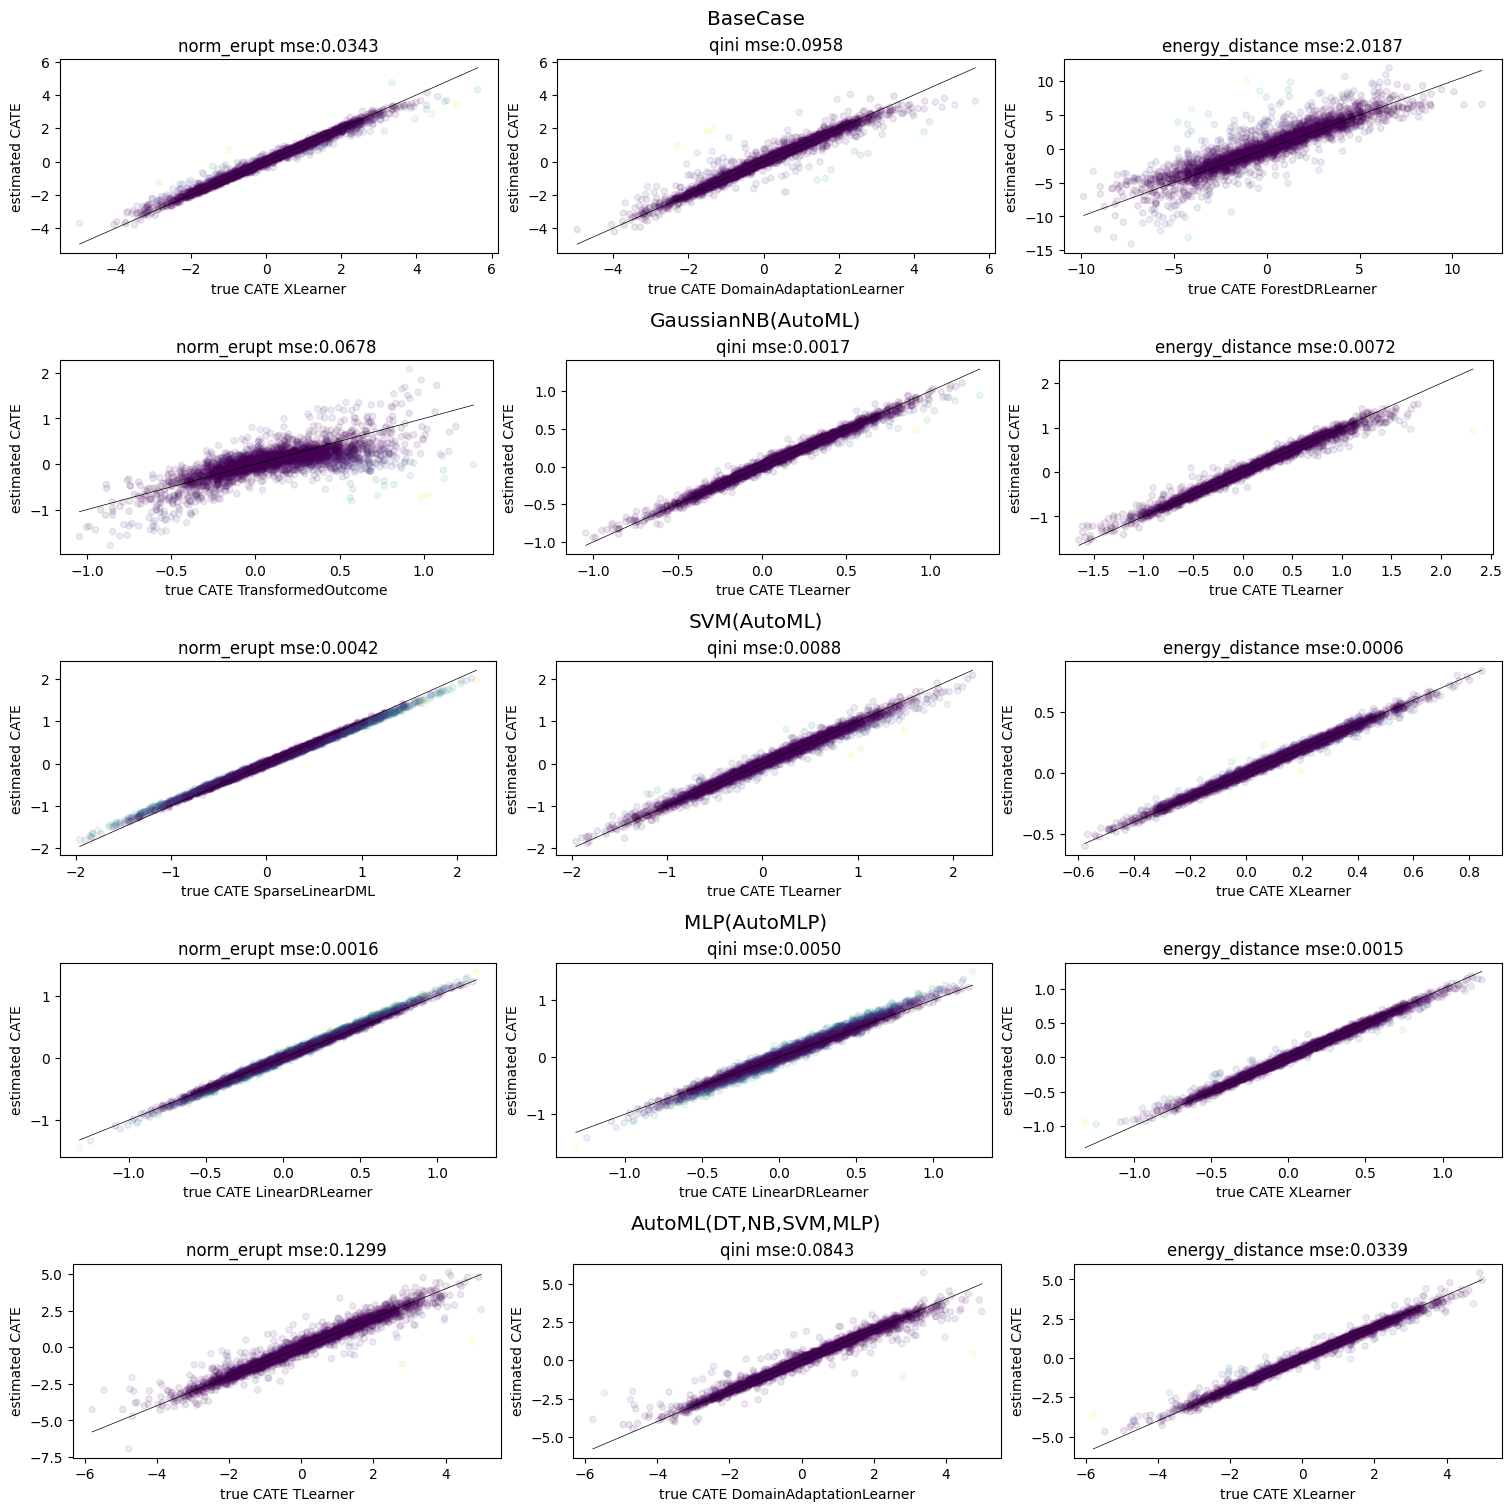

In [7]:
%matplotlib inline
fig = plt.figure(constrained_layout=True, figsize=(15, 15))
subfigs = fig.subfigures(len(out_dir), 1 )#wspace=0.07
i=0
j=1
for i in range(len(out_dir)):
    ax=subfigs[i].subplots(1,3)
    subfigs[i].suptitle(subtitle[i], fontsize='x-large')
    #subfigs[i].set_facecolor('0.75')
    for j in range(len(metrics)):
        try:
            with open(f"{out_dir[i]}{filename_out}_{metrics[j]}_run_1.pkl","rb") as f:
                results = pickle.load(f)
            CATE_gt = results["scores_per_estimator"][results["best_estimator"]][0]["test"]["CATE_groundtruth"].values
            CATE_est = np.array(results["scores_per_estimator"][results["best_estimator"]][0]["test"]["CATE_estimate"]).reshape(-1,)
            e=(CATE_gt-CATE_est)**2
            mse=np.mean((CATE_gt-CATE_est)**2)
            ax[j].scatter(CATE_gt,CATE_est,s=20,alpha=0.1,c=e,cmap='viridis')          
            ax[j].plot([min(CATE_gt),max(CATE_gt)],[min(CATE_gt),max(CATE_gt)],"k-",linewidth=0.5)
            ax[j].set_xlabel(f"true CATE {results['best_estimator'].split('.')[-1]}")
            ax[j].set_ylabel("estimated CATE")
            ax[j].set_title(f"{results['optimised_metric']} mse:{mse:1.4f}")
    
        except(e):
            print(f"here {e}")
            pass
    

plt.savefig('./plot/MSE.png')

<>:34: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:34: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_62215/2820357446.py:34: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if i is 1:
/tmp/ipykernel_62215/2820357446.py:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if i is 0:


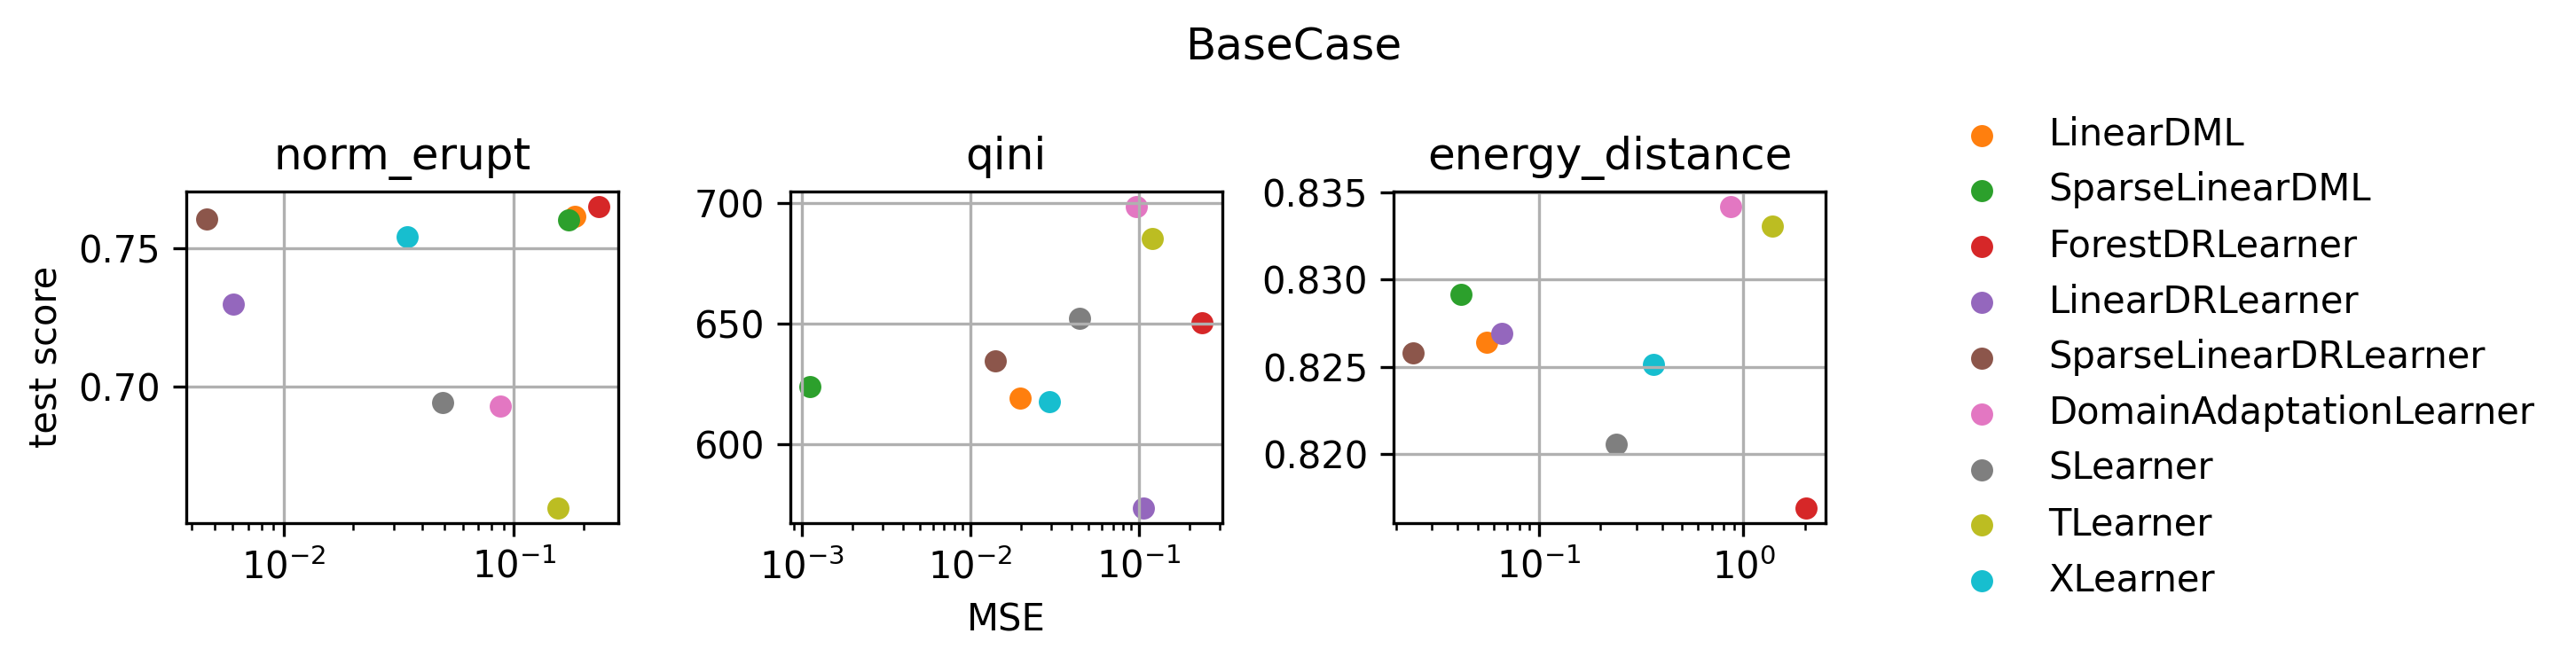

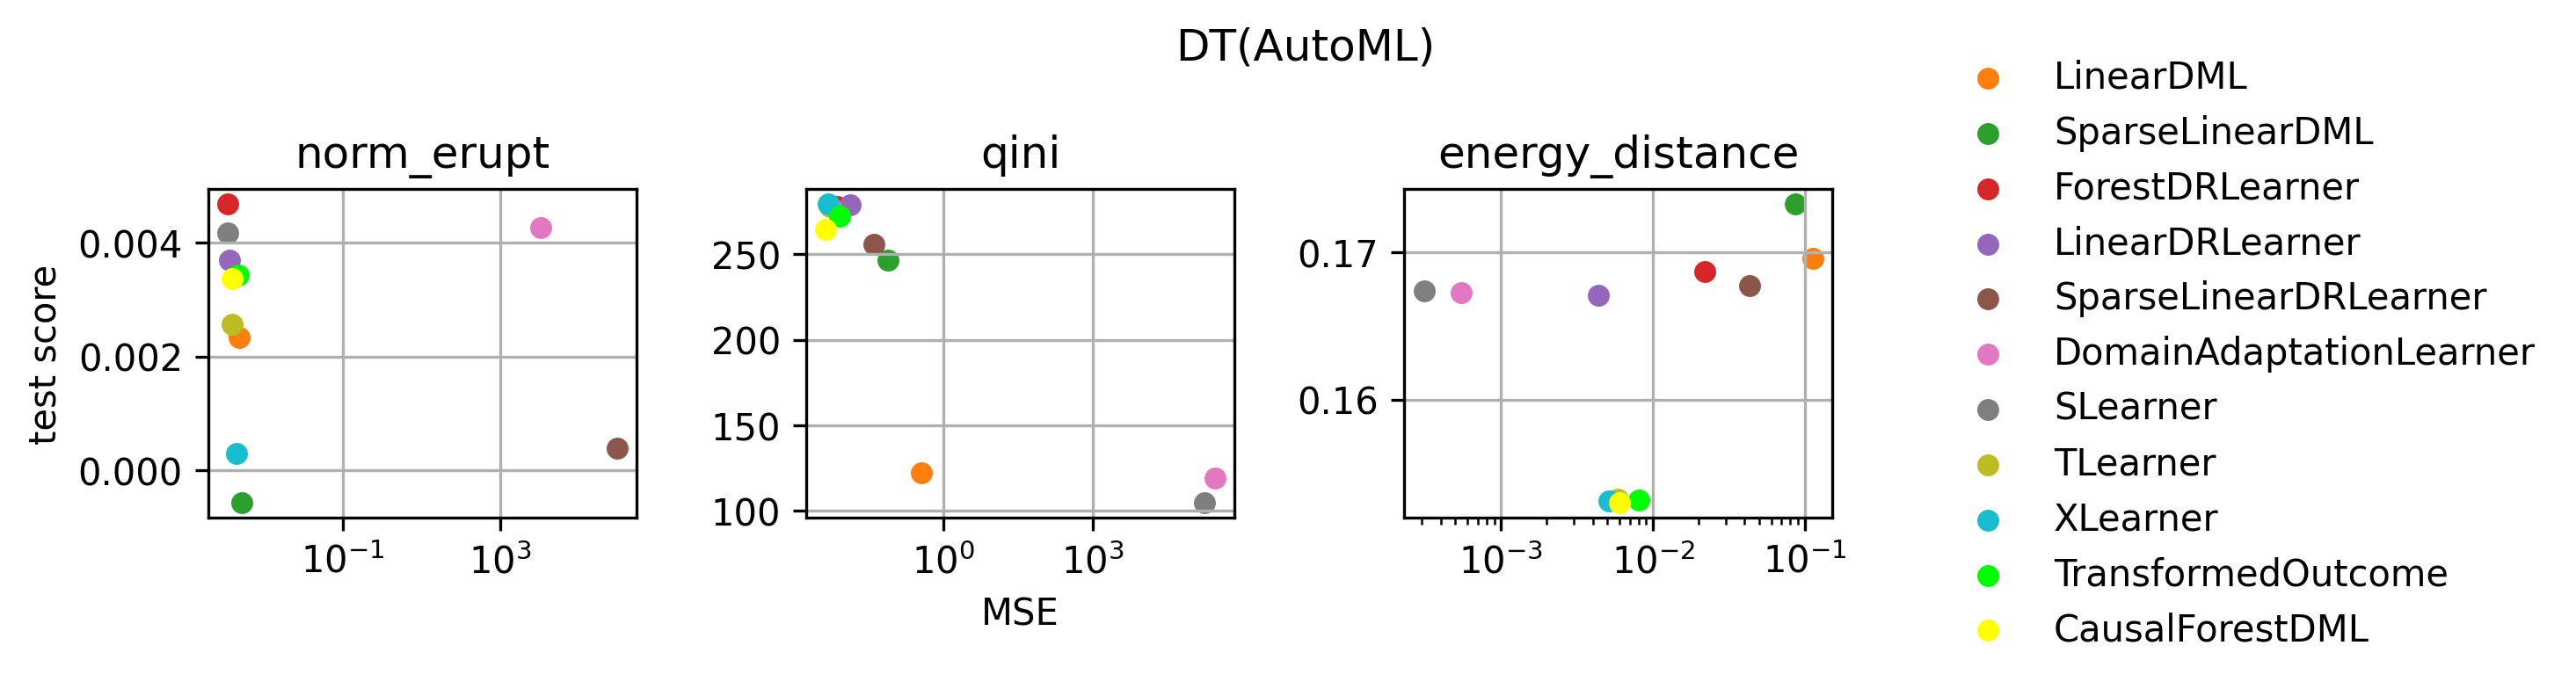

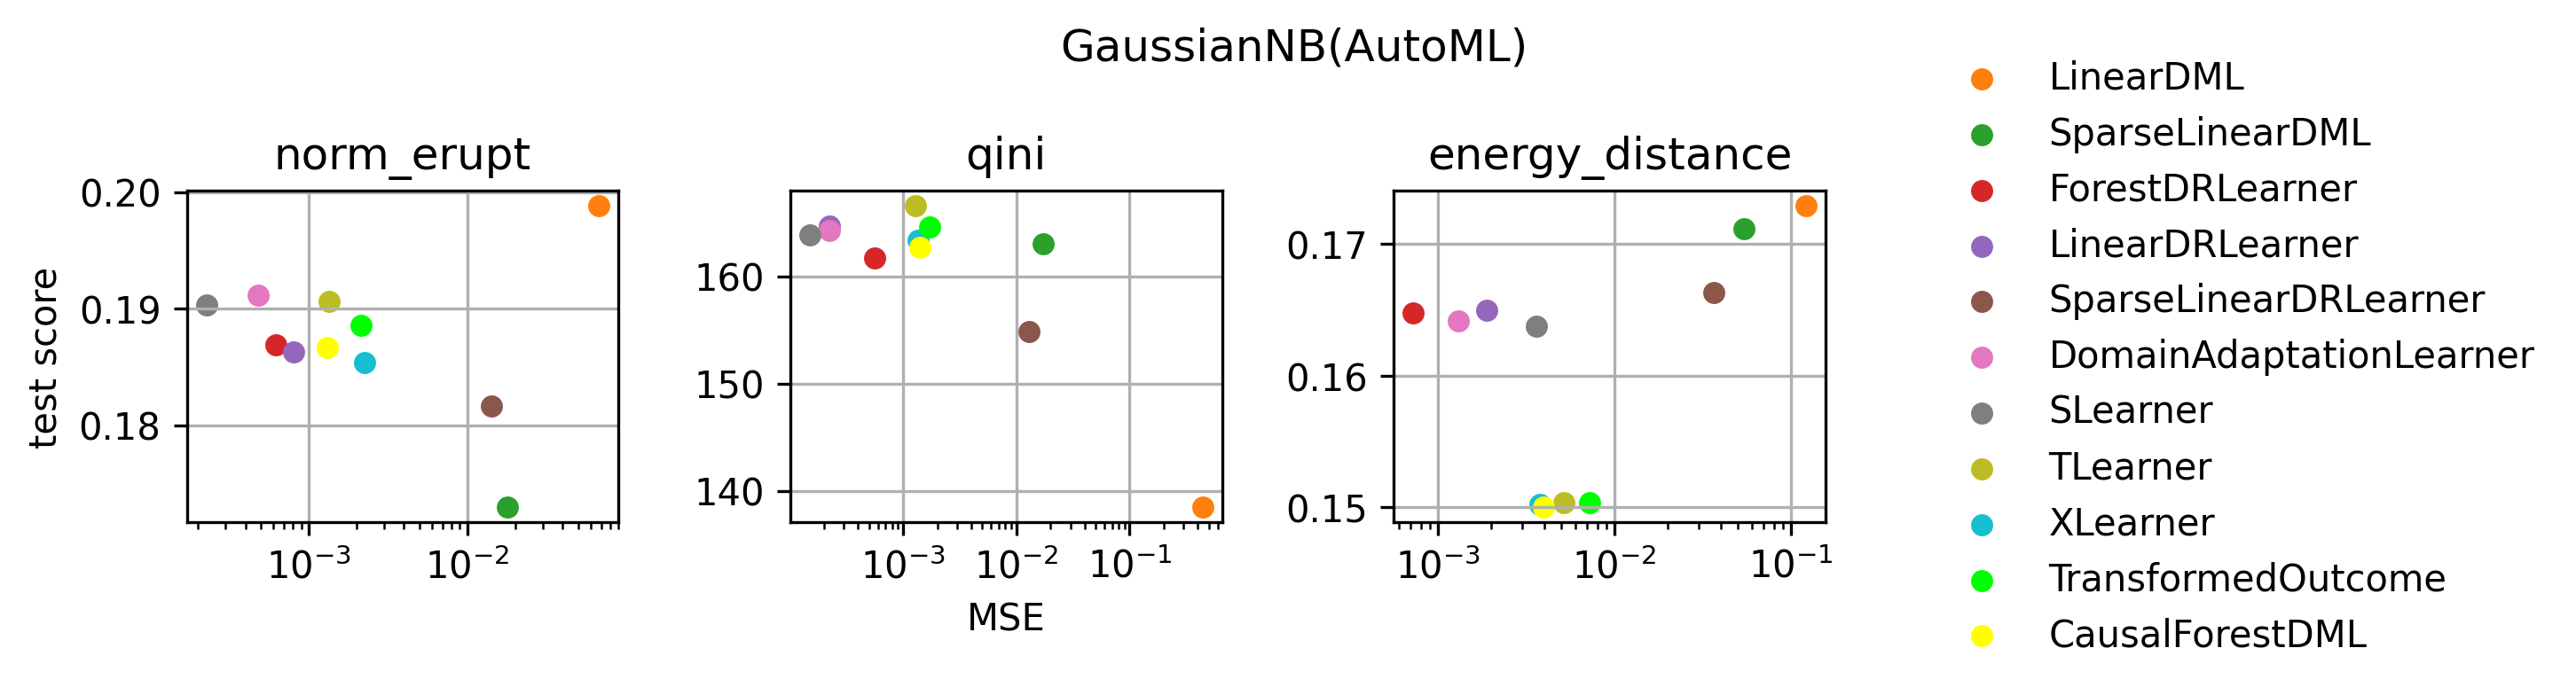

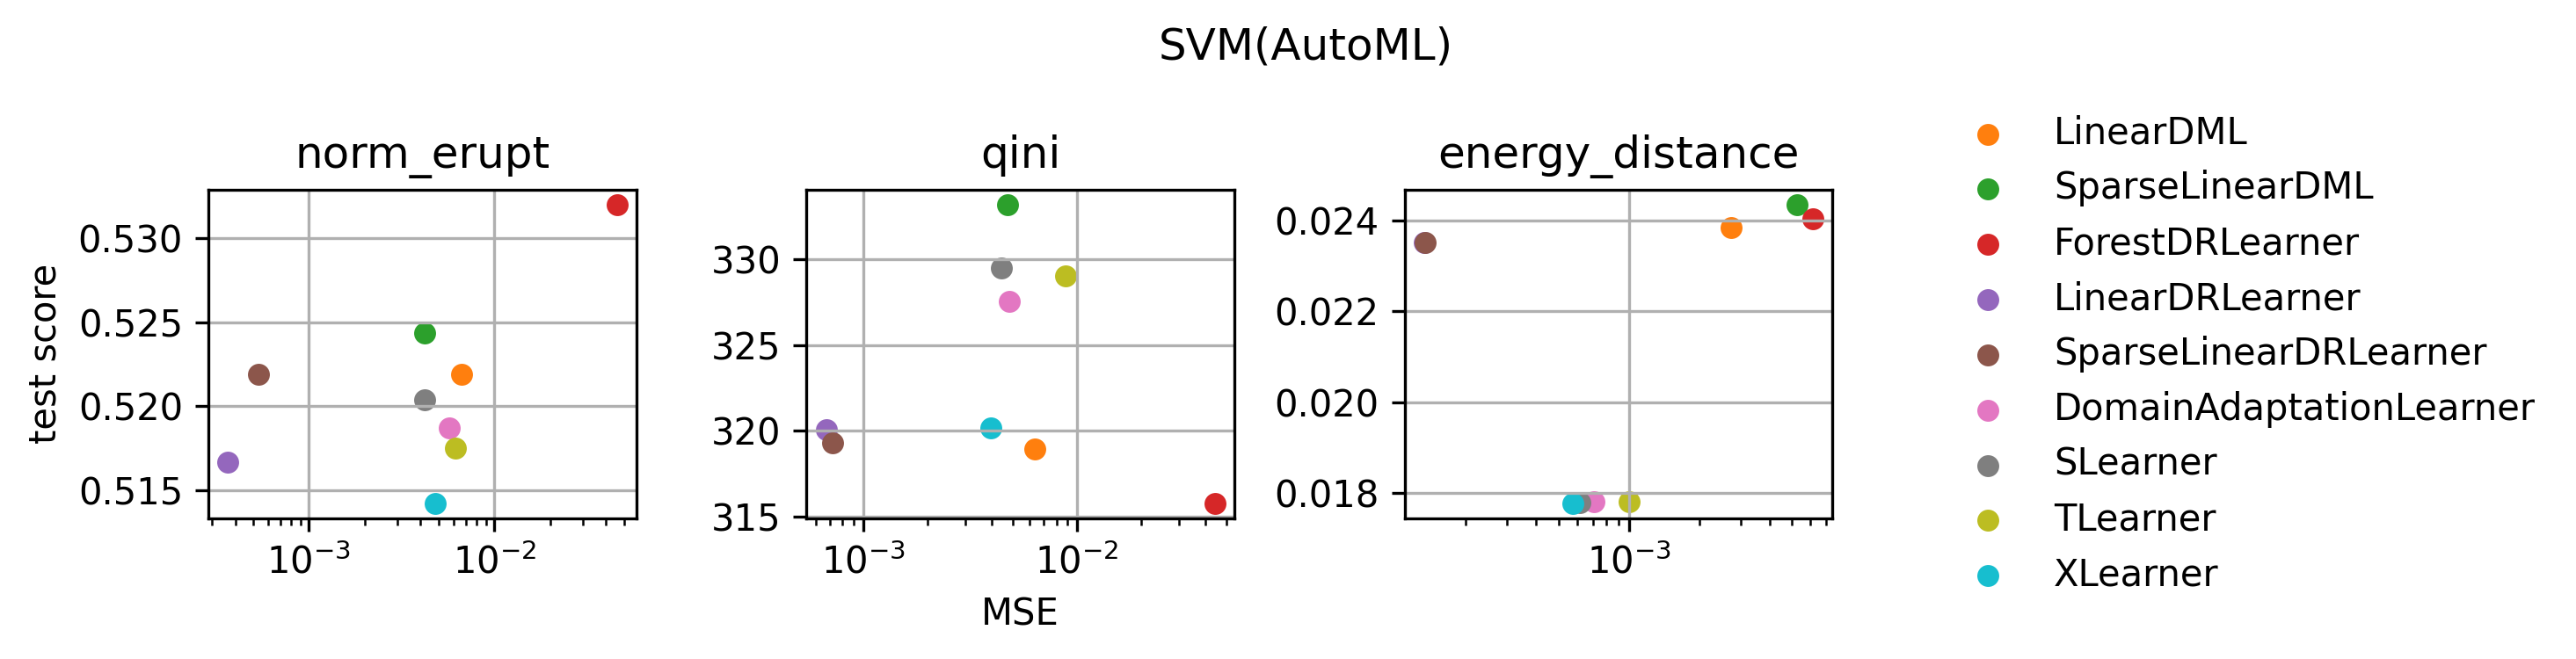

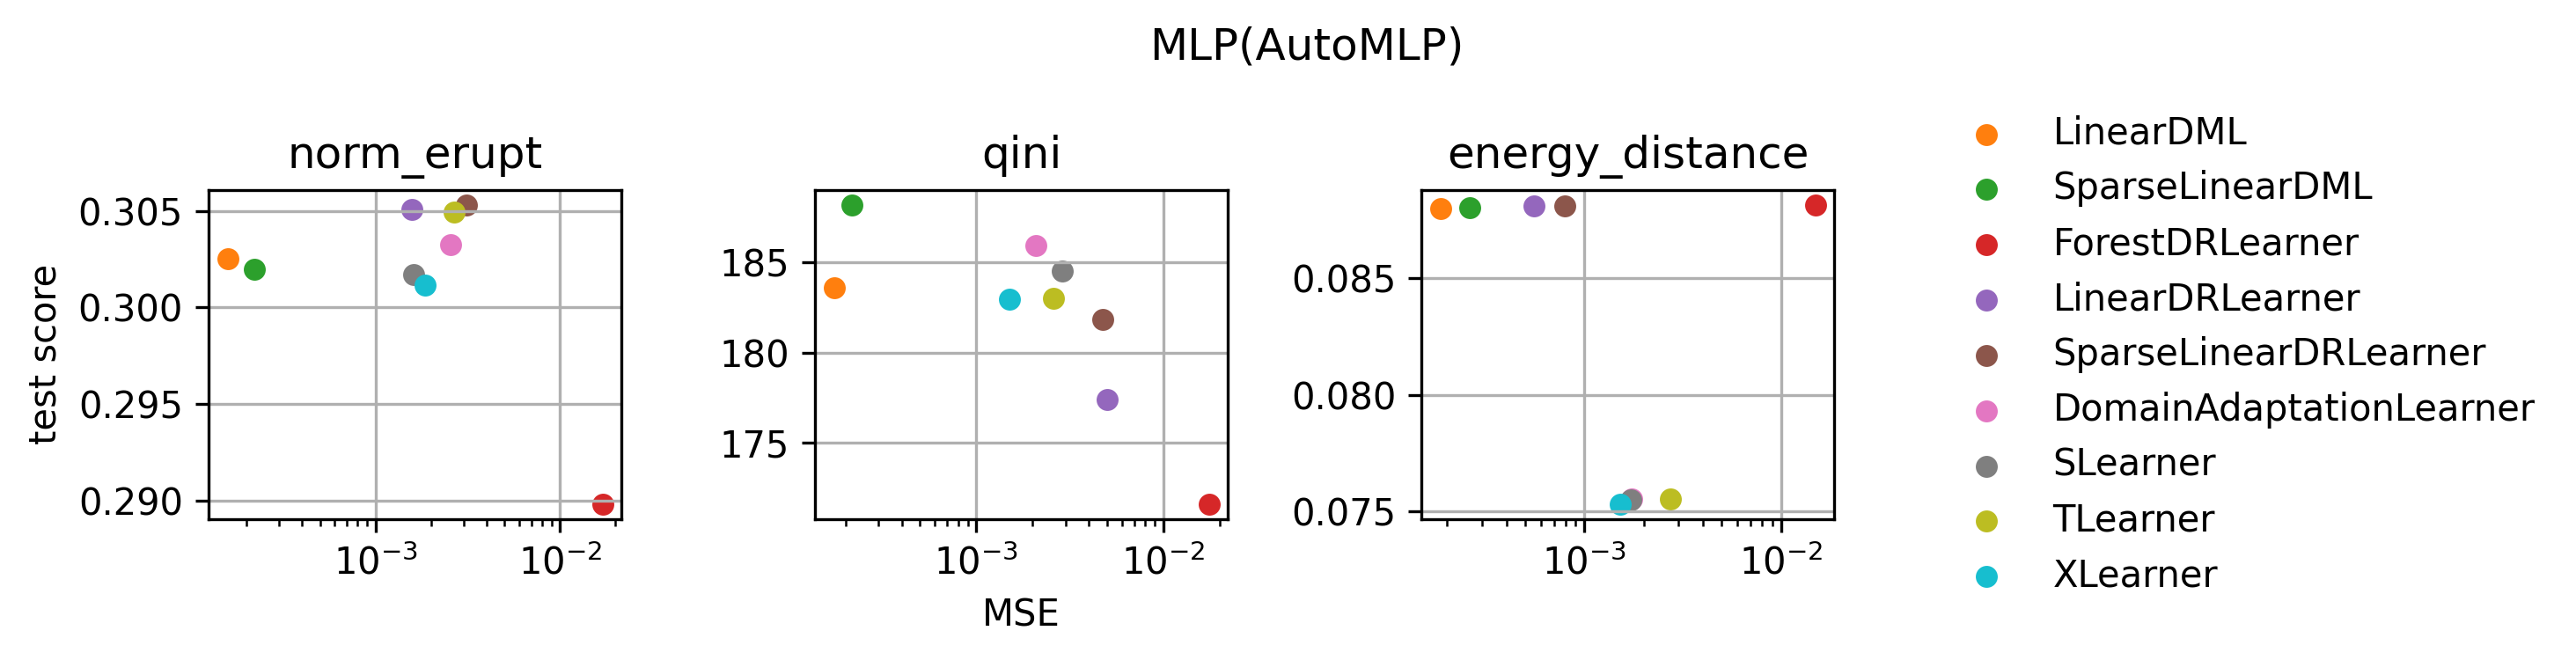

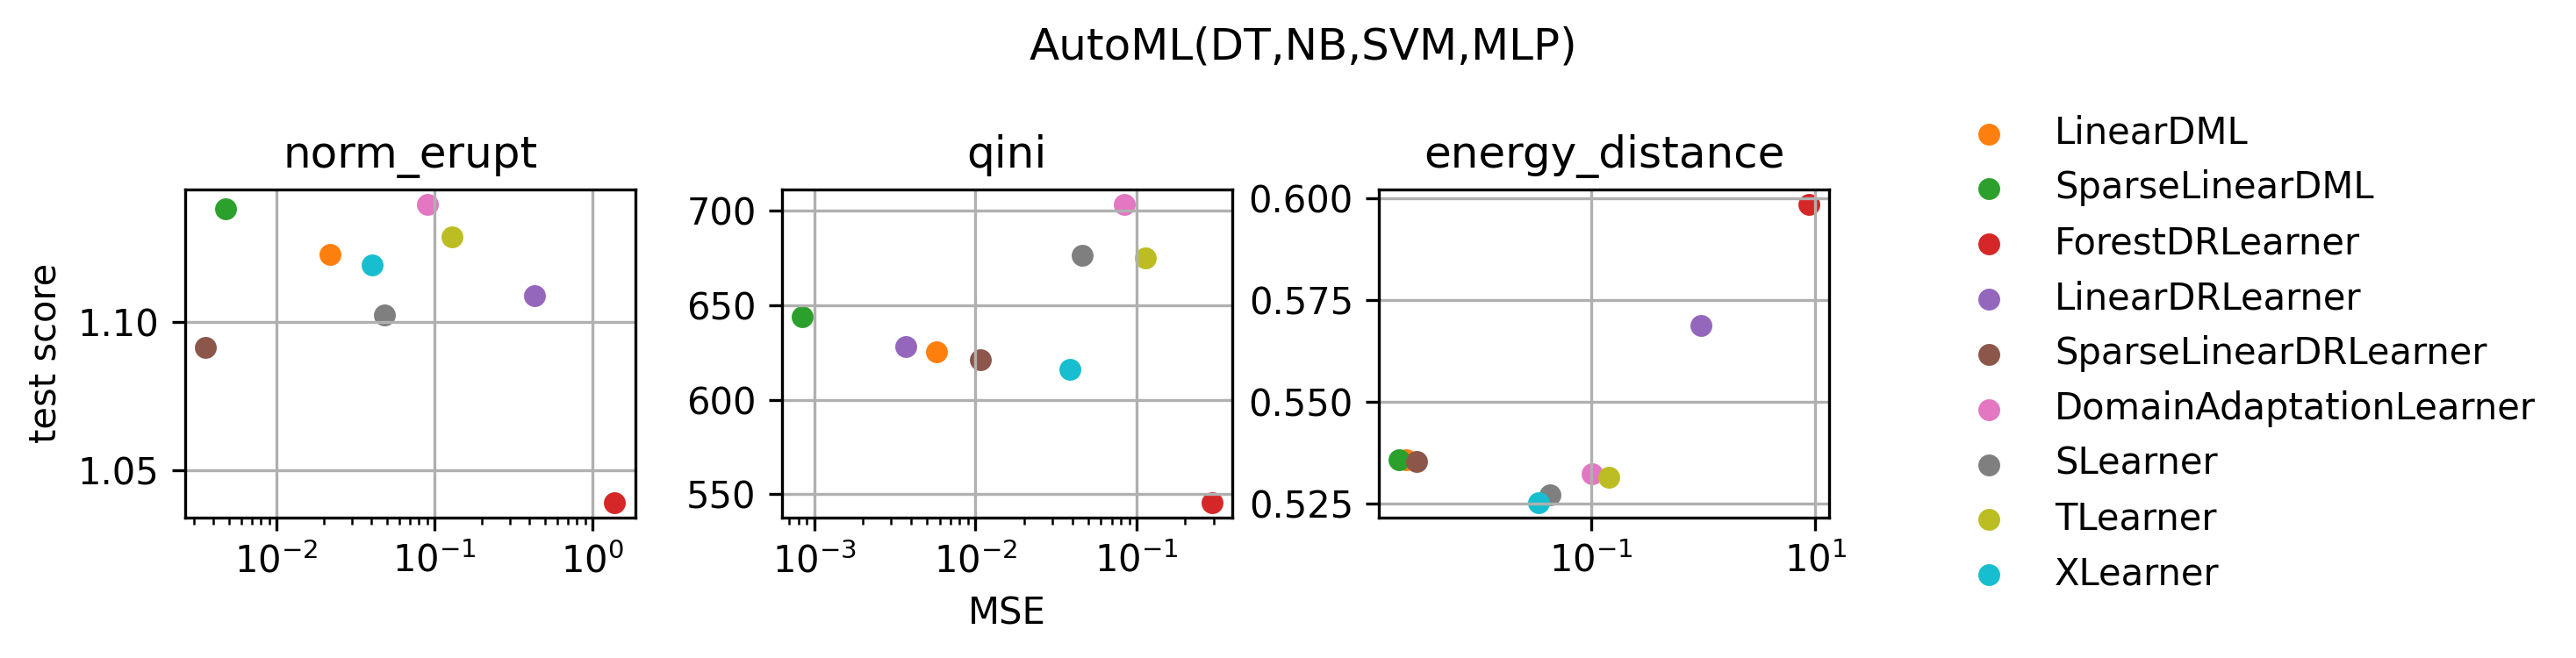

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

colors = ([matplotlib.colors.CSS4_COLORS['black']] +
    list(matplotlib.colors.TABLEAU_COLORS) + [
    matplotlib.colors.CSS4_COLORS['lime'],
    matplotlib.colors.CSS4_COLORS['yellow'],
    matplotlib.colors.CSS4_COLORS['pink']
])

# f, axs = plt.subplots(1,len(metrics),)

est_labels = [[], [], []]
sc = [[], [], []]
for j in range(len(out_dir)):
    plt.figure(figsize=(10,2.5),dpi=300)
    for i, metric in enumerate(metrics):
        plt.subplot(1, len(metrics), i+1)
        plt.suptitle(subtitle[j])
        with open(f"{out_dir[j]}{filename_out}_{metric}_run_1.pkl","rb") as f:
            results = pickle.load(f)
    
        for (est_name, scr), col in zip(results["scores_per_estimator"].items(),colors): 
            if "Dummy" not in est_name:
                if len(scr):
                    CATE_gt = scr[0]["test"]["CATE_groundtruth"].values
                    CATE_est = scr[0]["test"]["CATE_estimate"].reshape(-1,)
                    mse=np.mean((CATE_gt-CATE_est)**2)
                    score = scr[0]["test"][metric]
                    plt.scatter(mse,score,color=col,s=30,linewidths=0.5)
                    est_labels[i].append(est_name.split(".")[-1])
        if i is 1:
            plt.xlabel("MSE")    
        if i is 0:
            plt.ylabel("test score") 
        plt.title(metric)
        plt.xscale("log")  
        #plt.xlim(10**-4.1,10**-2.1)
        plt.grid(True)
    
    plt.legend(est_labels[0],loc='center left', bbox_to_anchor=(1.2, 0.5),frameon=False)
    plt.tight_layout()
    #out=out.replace("/","")
    #out=out.replace(".","")
    plt.savefig(f"./plot/{subtitle[j]}_Metric_vs_MSE.png")
    plt.show()

In [39]:
type(results['best_estimator'])

str